In [238]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\RAZORBLADE\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [239]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import plotly.express as px

In [240]:
#read ex1data2.txt file where first two columns are X1 and X2 and last column is Y
df = pd.read_csv('ex1data2.txt', header=None)
#rescale the data to be between 0 and 1
df = (df - df.mean()) / df.std()

df.columns = ['Area', 'Bedrooms', 'Prices(1000$)']
#divide the last column by 1000 to get the prices in 1000$
#df['Prices(1000$)'] = df['Prices(1000$)'] / 1000
df.head()

,Area,Bedrooms,Prices(1000$)
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [241]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(47, 2) (47,)


Calculating Weights

In [242]:
#function to calculate weights
def wi(x,X,tau):
    '''
    function to calculate weights

    Arguments:
    x -- x where we want to predict
    X -- training set
    tau -- value of tau

    Returns:
    w -- weight
    '''
    # calculate the length of the training set
    n = X.shape[0]
    #initialize the weights 
    w = np.mat(np.eye(n))
   # Calculating weights for all training examples [x(i)'s].
    for i in range(n): 
        xi = X[i] 
        #print(xi, x)
        d = (-2 * tau * tau) 
        #print(xi.shape, x.shape)
        w[i, i] = np.exp(np.dot((xi-x), (xi-x).T)/d) 
        
    return w
    

Predict Function

In [243]:
def predict(X,y,x,tau):
    '''
    function to predict the value of x

    Arguments:
    X -- training set
    y -- target values
    x -- x where we want to predict
    tau -- value of tau

    Returns:
    y_pred -- predicted value
    '''
    # calculate the length of the training set
    m = X.shape[0] 
        
    # Appending a cloumn of ones in X to add the bias term.
    #X_ = np.append(arr = np.ones((m, 1)).astype(int), values = X, axis = 1) 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
        
    # point is the x where we want to make the prediction. 
    #add  1 to the end of the point to add the bias term
    x_ = np.append(arr = x, values = 1)
    # x_ = np.array([x,1])
    
    #print(x_)
    # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    
    w = wi(x_, X_, tau) 
        
    # Calculating parameter theta using the formula.
    #print the shapes of X_ and w
 
    # #reshape y to 47x1
    y = y.reshape(m,1)
    #print(X_.shape, w.shape,y.shape)
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))
     
        
    # Calculating predictions.  
    #reduce the dimension of theta
    # reduce dimension of theta by 1 using numpy slicing
    # theta = np.array([i[0] for i in theta])
    # convert thets to be a row vector
    
    #print("------",theta.shape)
    pred = np.dot(x_, theta)
    
   

    # # get the predicted value from pred
    y_pred = pred[0,0]
    #print(type (pred), y_pred)
    # Returning the theta and predictions 
    # print(theta.shape)
    return theta, y_pred

Plot the Predictions

In [244]:
#function to plot the predictions using predict function
def plot_predictions(X,y,tau,nval):
    '''
    function to plot the predictions

    Arguments:
    X -- training set
    y -- target values
    tau -- value of tau

    Returns:
    None
    '''
    # X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    m= X.shape[0]
    #X_test = np.append(X, np.ones(m).reshape(m,1), axis=1)
   # Predicting for all nval values and storing them in preds. 
    for point in X: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
#    # Reshaping X_test and preds
#     X_test = np.array(X).reshape(nval,1)
#     preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    # plt.plot(X, y, 'b.')
    # plt.plot(X_test, preds, 'r.') # Predictions in red color.
    # plt.show()
#    # Empty list for storing predictions. 
#     preds = [] 
#     theta=None
    
#    # Predicting for all nval values and storing them in preds. 
#     for point in X: 
#         theta, pred = predict(X, y, point, tau) 
#         #print(theta)
#         preds.append(pred)
    # print(preds,y)
    #pot the predictions on a 3d plot.
    
    return preds
    
    
    

[0.4575533319487152, -0.42605025882952097, 0.28353960869157735, -0.8626609554798237, 1.5953899564224558, -0.4600070950285584, -0.3477357674758068, -0.5816599233398341, -0.7499149975452306, -0.34413273622245555, -0.5455150468811522, 0.10334996397155445, -0.14269171835719902, 2.874981038969331, -0.8169967125790095, 0.8707072459593952, -0.3240006870930858, -0.786196228621733, 1.2757775081419371, 2.0680385928660527, -0.6194807454435207, -0.6660472125988502, -0.4330482845524195, -0.5238965535344461, 1.8673026865652198, -0.7022713769060479, -0.421908728599532, 0.7450816822699253, 0.5363965527583032, -0.32150588169605054, -0.06650957899550786, -1.3636659989209772, -0.2944115765163402, 1.8636177057833567, -0.37858051498000134, -0.5243614124187115, -0.7910194835080282, -0.17985145909641442, 1.6681662502567884, -0.12850419329418336, 0.22338757725868685, 0.3117390615506155, -0.199932523863259, -0.7187863922263107, -1.283596452079033, -0.43238040943077494, -0.7237346087005274]


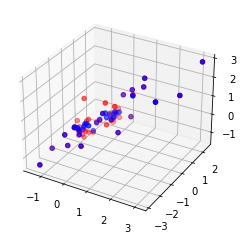

In [245]:
# np.random.seed(8)
# X = np.random.randn(1000,1)
# y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)
nval = len(X)
tau = 0.08
p = plot_predictions(X,y,tau,nval)
print(p)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.scatter(X[:,0], X[:,1], p, c='b', marker='o')
plt.show()

In [246]:
#add one column at the end of df 
df['label'] = 'original'
df

,Area,Bedrooms,Prices(1000$),label
0,0.130010,-0.223675,0.475747,original
1,-0.504190,-0.223675,-0.084074,original
2,0.502476,-0.223675,0.228626,original
3,-0.735723,-1.537767,-0.867025,original
4,1.257476,1.090417,1.595389,original
5,-0.019732,1.090417,-0.323998,original
6,-0.587240,-0.223675,-0.204036,original
7,-0.721881,-0.223675,-1.130948,original
8,-0.781023,-0.223675,-1.026973,original
9,-0.637573,-0.223675,-0.783051,original


In [247]:
#create a new dataframe with the predictions and the actual values
df_pred = pd.DataFrame(p)
df_pred.columns = ['Prices(1000$)']
df_pred['Area'] = df['Area']
df_pred['Bedrooms'] = df['Bedrooms']
df_pred['label']='Predicted'
df_pred

,Prices(1000$),Area,Bedrooms,label
0,0.457553,0.130010,-0.223675,Predicted
1,-0.426050,-0.504190,-0.223675,Predicted
2,0.283540,0.502476,-0.223675,Predicted
3,-0.862661,-0.735723,-1.537767,Predicted
4,1.595390,1.257476,1.090417,Predicted
5,-0.460007,-0.019732,1.090417,Predicted
6,-0.347736,-0.587240,-0.223675,Predicted
7,-0.581660,-0.721881,-0.223675,Predicted
8,-0.749915,-0.781023,-0.223675,Predicted
9,-0.344133,-0.637573,-0.223675,Predicted


In [248]:
#append rows of df_pred to df
df = df.append(df_pred, ignore_index=True)
df

,Area,Bedrooms,Prices(1000$),label
0,0.130010,-0.223675,0.475747,original
1,-0.504190,-0.223675,-0.084074,original
2,0.502476,-0.223675,0.228626,original
3,-0.735723,-1.537767,-0.867025,original
4,1.257476,1.090417,1.595389,original
...,...,...,...,...
89,0.712618,1.090417,-0.199933,Predicted
90,-1.007523,-0.223675,-0.718786,Predicted
91,-1.445423,-1.537767,-1.283596,Predicted
92,-0.187090,1.090417,-0.432380,Predicted


In [253]:
#plot the dataframe using plotly
fig = px.scatter_3d(df, x="Area", y="Bedrooms", color="label",z="Prices(1000$)" )
fig.show()
